# §1 Basics of Julia

## Basic Literals

### Variables and Operations

In [1]:
x = 3
y = 1.2
z = "hoge"

"hoge"

In [2]:
typeof(x)

Int64

In [3]:
typeof(y)

Float64

In [4]:
typeof(z)

String

In [5]:
x + y
x - y
x * y
y / x
y ^x
y ÷ x #option + /
(x + 1) % x
x == y
x < y
x > y
x ≤ y #option + ,
x ≥ y #option + .
!(x == x)

false

In [6]:
μ = 0.0 #\mu -> Tab
σ = 2.0 #\sigma -> Tab
xᵢ = 0 #x\_i -> Tab
σ² = σ^2 #\sigma -> Tab \^2 -> Tab

4.0

In [7]:
1 == 1 && 2 == 2

true

In [8]:
1 == 1 || 1 == 2

true

### Regulatory Literals

In [9]:
x = 1.0
y = 2.0
if x < y
    println("x is smaller than y")
elseif x == y
    println("x is equal to y")
else
    println("x is larger than y")
end

x is smaller than y


- ternary operator

In [10]:
x = -3
y = x < 0 ? "T" : "F"
println(y)

T


- short-circuit evaluatio

In [11]:
a = 0
b = 0
c = 0
true && (a = 1)
true || (b = 1)
false || (c = 1)
println("a=$(a), b=$(b), c=$(c)")

a=1, b=0, c=1


In [12]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


### Function

In [13]:
myinv(x) = 1 / x

myinv (generic function with 1 method)

In [14]:
myinv(1e-5)

99999.99999999999

In [15]:
function mypow(x)
    return 2 ^x
end

mypow (generic function with 1 method)

In [16]:
mypow(pi)

8.824977827076287

In [17]:
function mymean(x, y)
    return (x + y) / 2
end

mymean (generic function with 1 method)

In [18]:
mymean(2, -1)

0.5

In [19]:
function mysum(x, y)
    z = x + y
end

mysum (generic function with 1 method)

In [20]:
mysum(1, 2)

3

In [21]:
function hoge(x, y, z)
    return x, y, z
end

hoge (generic function with 1 method)

In [22]:
hoge(3, 2, 1)

(3, 2, 1)

### Array

In [23]:
a = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [24]:
b = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [25]:
c = Array{Float64}(undef, 3)

3-element Vector{Float64}:
 2.1219957915e-314
 2.1219957915e-314
 4.2439915824e-314

In [26]:
d = zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [27]:
e = ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

- Uniform Distribution [0, 1]

In [28]:
f = rand(3)

3-element Vector{Float64}:
 0.6308778526693078
 0.23216485362280082
 0.4341210181271459

- N(0, 1)

In [29]:
g = randn(3)

3-element Vector{Float64}:
 -0.47367136329007115
  0.32706859434336427
  0.6892032438063895

- matrices

In [30]:
A = [1 2 3 4
    5 6 7 8]

2×4 Matrix{Int64}:
 1  2  3  4
 5  6  7  8

In [31]:
ones(2, 4)

2×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [32]:
size(A)

(2, 4)

In [33]:
length(A)

8

In [34]:
A[2, :]

4-element Vector{Int64}:
 5
 6
 7
 8

In [35]:
[2 * i for i in 1:5]

5-element Vector{Int64}:
  2
  4
  6
  8
 10

In [36]:
[(i, j) for i in 1:5, j in 1:3]

5×3 Matrix{Tuple{Int64, Int64}}:
 (1, 1)  (1, 2)  (1, 3)
 (2, 1)  (2, 2)  (2, 3)
 (3, 1)  (3, 2)  (3, 3)
 (4, 1)  (4, 2)  (4, 3)
 (5, 1)  (5, 2)  (5, 3)

- Tuple

In [37]:
params = (1, 2, 3)
fₐ(a, b, c) = a + b + c
fₐ(params...) 

6

### Broadcasting

In [38]:
a = [1, 2, 3]
a + 1

LoadError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
[0m  +([91m::LinearAlgebra.UniformScaling[39m, ::Number) at /opt/julia-1.8.5/share/julia/stdlib/v1.8/LinearAlgebra/src/uniformscaling.jl:144
[0m  ...

In [39]:
a .+ 1

3-element Vector{Int64}:
 2
 3
 4

In [40]:
function add_one(x)
    return x + 1
end
add_one.([1, 2, 3])

3-element Vector{Int64}:
 2
 3
 4

### Anonymous Function

In [41]:
x -> x + 1

#5 (generic function with 1 method)

In [42]:
map(x -> x + 1, [1, 2, 3])

3-element Vector{Int64}:
 2
 3
 4

### Macro

In [43]:
function test(maxiter)
    a = []
    for i in 1:maxiter
        push!(a, randn())
    end
    sum(a)
end
@time test(100000)

  0.009687 seconds (201.39 k allocations: 4.962 MiB, 43.27% compilation time)


-530.5209578190074

## Packages

### Download

In [44]:
mean([1, 2, 3, 4, 5])

LoadError: UndefVarError: mean not defined

In [45]:
using Pkg
Pkg.add("Statistics")

    Updating registry at `/opt/julia/registries/General.toml`
   Resolving package versions...
    Updating `/opt/julia/environments/v1.8/Project.toml`
  [10745b16] + Statistics
  No Changes to `/opt/julia/environments/v1.8/Manifest.toml`


### Reading Packages

In [46]:
using Statistics
mean([1, 2, 3, 4, 5])

3.0

## Plotting

In [47]:
using PyPlot

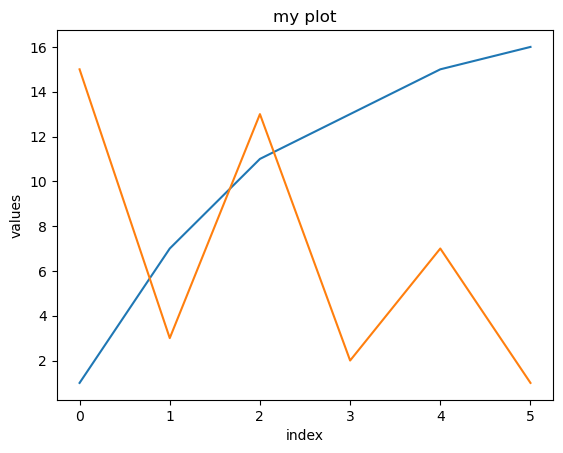

PyObject Text(0.5, 1.0, 'my plot')

In [48]:
y1 = [1, 7, 11, 13, 15, 16]
y2 = [15, 3, 13, 2, 7, 1]

fig, ax = subplots()

ax.plot(y1)
ax.plot(y2)

ax.set_xlabel("index")
ax.set_ylabel("values")
ax.set_title("my plot")

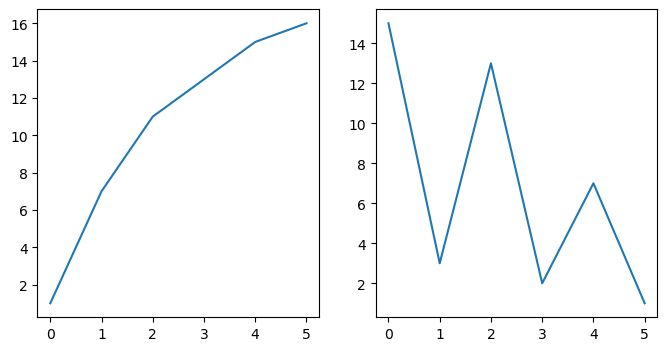

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f17587dfa00>

In [49]:
fig, ax = subplots(1, 2, figsize=(8, 4))
ax[1].plot(y1)
ax[2].plot(y2)

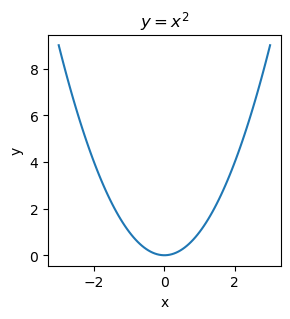

3-element Vector{PyCall.PyObject}:
 PyObject Text(0.5, 1.0, '$y=x^2$')
 PyObject Text(0.5, 23.999999999999993, 'x')
 PyObject Text(24.0, 0.5, 'y')

In [52]:
using LaTeXStrings

fₓ(x) = x ^2
xs = range(-3, 3, length=100)

fig, ax = subplots(figsize=(3, 3))
ax.plot(xs, fₓ.(xs), "-")
ax.set(xlabel="x", ylabel="y", title=L"y=x^2")

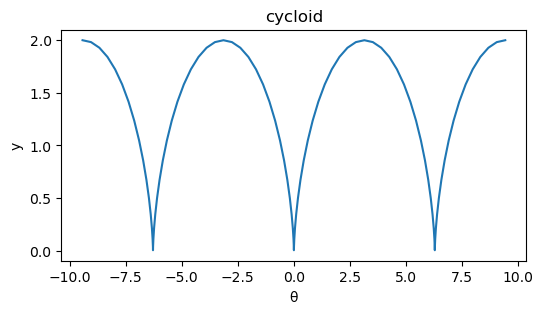

In [53]:
r = 1
fx(θ) = r * (θ - sin(θ))
fy(θ) = r * (1 - cos(θ))
θs = range(-3pi, 3pi, length=100)

fig, ax = subplots(figsize=(6, 3))
ax.plot(fx.(θs), fy.(θs))
ax.set(xlabel="θ", ylabel="y", title="cycloid");

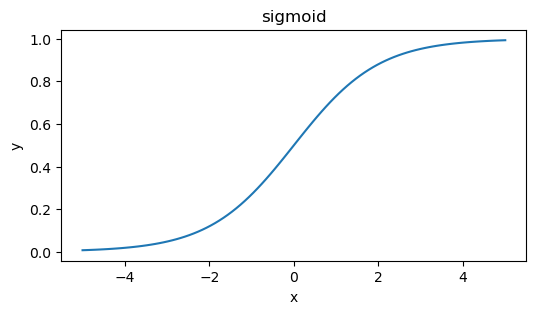

In [54]:
sig(x) = 1 / (1 + exp(-x))
xs = range(-5, 5, length=100)

fig, ax = subplots(figsize=(6, 3))
ax.plot(xs, sig.(xs))
ax.set(xlabel="x", ylabel="y", title="sigmoid");

- Scatter plot

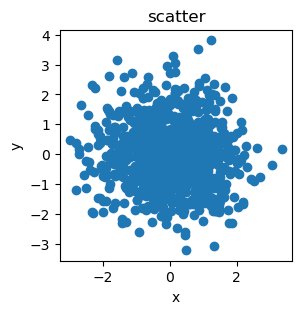

In [55]:
x = randn(1000)
y = randn(1000)

fig, ax = subplots(figsize=(3, 3))
ax.scatter(x, y)
ax.set(xlabel="x", ylabel="y", title="scatter");

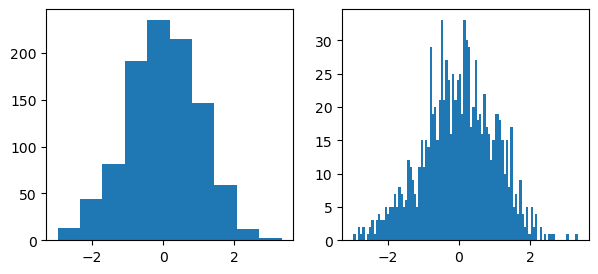

In [56]:
fig, ax = subplots(1, 2, figsize=(7, 3))
ax[1].hist(x)
ax[2].hist(x, bins=100);

- Contour map

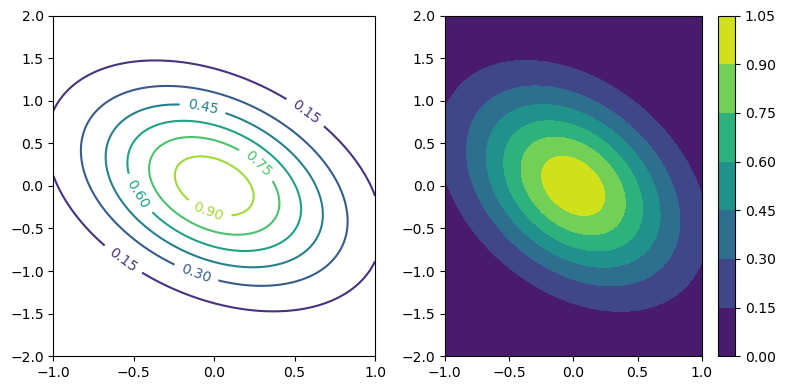

In [57]:
fz(x, y) = exp(-(2x ^2 + y ^2 + x * y))

xs = range(-1, 1, length=100)
ys = range(-2, 2, length=100)

fig, ax = subplots(1, 2, figsize=(8, 4))

cs1 = ax[1].contour(xs, ys, fz.(xs', ys))
ax[1].clabel(cs1, inline=true)

cs2 = ax[2].contourf(xs, ys, fz.(xs', ys))
fig.colorbar(cs2)

tight_layout()